#Single-server queueing system simulation


Consider a single-server queueing system model applied for simulating a toll station. Assume that vehicle arrivals are modeled as a Possion process with arrival rate λ while the service time has the exponential distribution with service rate μ.

Q1: Please program a stochastic simulation machine on the single-server queueing model system according to the proposed approach in the Simulation book
(Chapter 7) of Sheldon M. Ross and answer the following questions:

*   what is the expected queue length? what is its variance? plot the distribution
of simulated queue length values.  
*   what is the probability that the waiting time is higher than 3 minutes i.e.
Pr(W > 180sec)? plot the distribution of simulated waiting times

Try different λ and μ such that λ/μ = 0.6 and λ/μ = 0.9. Plot the results of the
cases after a large number of simulation runs

The approach menthioned in the book is called "discrete event simulation approach"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We first tried to write a function that can generate the random number. These numbers are represented as the interarrival time of vehicles and they follow Possion process. We use the lab1 exercise and the Ross book as references to write this method.

[2.557972874891065, 0.8142269821928586, 10.038365536382466, 2.602821155270389, 0.0062091996599268305, 3.2980560284761027, 0.6011110740377797, 0.4100444411168377, 0.3944139220870339, 10.005181916363634, 8.762800681422139, 0.8921092575641273, 1.7059791802644635, 6.477951406253012, 2.3817148206517214, 1.5466909138931313, 2.0714404990963944, 5.454977126723692, 5.187089269542495, 0.7372274855909923, 1.2813151426639617, 0.5424803340897544, 0.6285843430977753, 0.020152084930553867, 0.927549528940141, 0.024491771198341394, 1.5031594754734137, 2.8566760587866233, 2.1259733139878603, 3.7957262020135087, 0.09417975194981941, 1.9379410922179874, 4.551846406033593, 6.2058035457376635, 2.270075873251912, 0.446578836957296, 5.624924894999987, 0.05549505493254203, 2.0407472520992185, 0.5281622227336253, 7.838470180698921, 4.4389601490454424, 0.9890128628956669, 5.658733495773216, 0.6009612240046123, 0.7307386876251328, 1.705686394396502, 1.043239443186264, 0.5509016999771581, 12.86180829238154, 5.8328

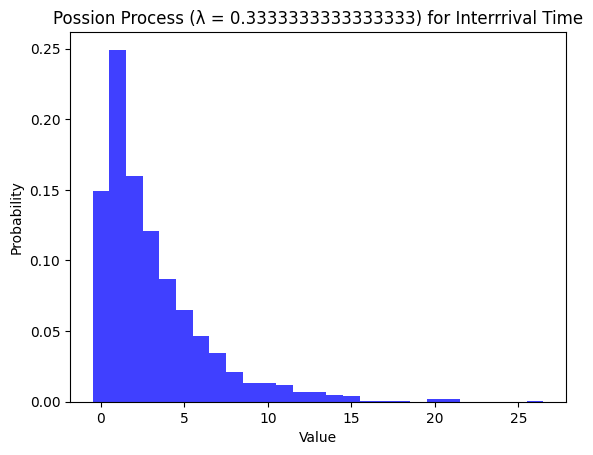

In [21]:
def generate_interarrival_time(start_time, lamda):
  t = start_time

  u1 = np.random.random()
  t -= np.log(u1) / lamda

  return t

start_time = 0  # Replace with your desired starting time
lambda_parameter=20/60

# Plot the histogram of multiple generated arrival time random variables
random_variable_size = 1200
interarrival_times = [generate_interarrival_time(start_time,lambda_parameter) for _ in range(random_variable_size)]

print(interarrival_times)

# Plot the histogram of generated arrival time random variables
plt.hist(interarrival_times, bins=np.arange(min(interarrival_times), max(interarrival_times) + 1) - 0.5, density=True, alpha=0.75, color='b')
plt.title(f'Possion Process (λ = {lambda_parameter}) for Interrrival Time')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()


Then we tried to write a function that generate random varibale which are representing the service time. The service time follows exponential distribution with service rate  μ. We still use the lab1 exercise and the Ross book as references.

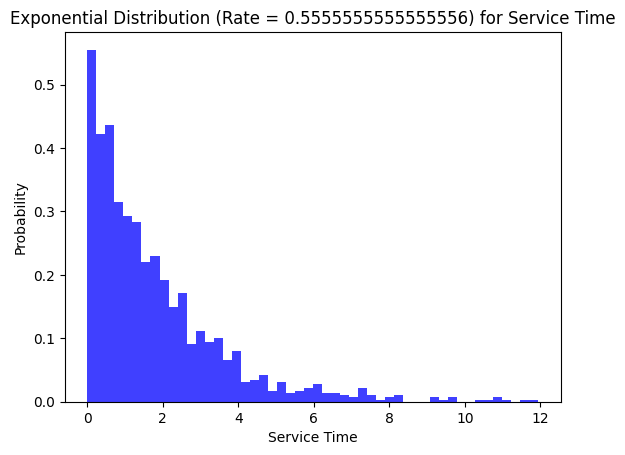

In [118]:
def generate_service_time(mu):
    # Generate a random number from a uniform distribution (0, 1)
    u = np.random.rand()

    # Generate a service time random variable using the inverse transform method
    service_time = - (1 / mu) * np.log(u)

    return service_time


# Example Usage:
mu_parameter = 20/60/0.6  # Service rate
random_variable_size = 1200

# Plot the histogram of multiple generated service time random variables
random_variable_size = 1200
service_times = [generate_service_time(mu_parameter) for _ in range(random_variable_size)]



plt.hist(service_times, bins=50, density=True, alpha=0.75, color='b')
plt.title(f'Exponential Distribution (Rate = {mu_parameter}) for Service Time')
plt.xlabel('Service Time')
plt.ylabel('Probability')
plt.show()


Below is a function that can simulate the single-server queueing situation by referring to the Ross book.

In [135]:
def single_server_queue_simulation(simulation_time,interarrival_rate,service_rate,constant_service_time=None):

  # Initialization
  time=0
  arrival_time=generate_interarrival_time(0,interarrival_rate)
  departure_time=float('inf') # No service initially
  num_of_customers = 0 # numebr of customers in system
  event_list = []
  arrival_time_of_customer_i=[]
  depature_time_of_customer_i=[]
  service_time_of_customer_i=[]
  queue_length_list=[]
  time_of_last_customer_departure=0
  service_time=0


  # Simulation loop
  while time < simulation_time:
    
    # if the next event is a new customer arriving
    if arrival_time <= departure_time:
      time = arrival_time
      arrival_time += generate_interarrival_time(0,interarrival_rate) # update it to the next arrival
      num_of_customers += 1
      event_list.append(("Arrival", time))
      arrival_time_of_customer_i.append(time)
     # if the system had been empty, we need to generate the service time of the new customer
      if num_of_customers == 1:
        if constant_service_time is not None:
          service_time= constant_service_time
        else:
          service_time= generate_service_time(service_rate)
        departure_time=time + service_time
        service_time_of_customer_i.append(service_time)

    # if the next event is the service completing and the customer leaving
    else:
      time = departure_time
      num_of_customers-=1
      event_list.append(("Departure", time))
      depature_time_of_customer_i.append(time)
      if num_of_customers > 0:
        if constant_service_time is not None:
          service_time= constant_service_time
        else:
          service_time= generate_service_time(service_rate)

        departure_time=time + service_time
        service_time_of_customer_i.append(service_time)
      else:
        departure_time=float('inf')
    if num_of_customers>0:
      queue_length_list.append(num_of_customers-1)

  # When we reach the end of the simulation time we set
  while num_of_customers>0:
    # print(queue_length)
    # print(len(arrival_time_of_customer_i))
    # print(len(depature_time_of_customer_i))
    # print(len(service_time_of_customer_i))
    time = departure_time
    num_of_customers-=1
    event_list.append(("Departure", time))
    depature_time_of_customer_i.append(time)
    if constant_service_time is not None:
        service_time= constant_service_time
    else:
        service_time= generate_service_time(service_rate)
    departure_time=time + service_time

    if num_of_customers>0:
      service_time_of_customer_i.append(service_time)
      
    if num_of_customers>0:
      queue_length_list.append(num_of_customers-1)


  time_of_last_customer_departure=max(time-simulation_time,0)


  # print('end')
  # print(service_time_of_customer_i)
  return event_list,arrival_time_of_customer_i,depature_time_of_customer_i,queue_length_list,service_time_of_customer_i


Then we write a function that can run a large number of simulation for tring different λ and μ. In our code, there will be a simulation loop. It will run a predefined number of times, each representing an independence instance of the single-server queueing system. For each run, vehicle interarrivals follow a Poisson process, the values of time are determined by using the interarrival time generating function. And the system's service times for vehicles are determined by using the service time generating function or the constant service time variable. In each run, the queue system will keep track of the queue length and waiting time of each vehicle.



In [208]:
def run_simulation(num_runs, simulation_time, interarrival_rate, lambda_over_mu, constant_service_time=None):
  service_rate = interarrival_rate / lambda_over_mu

  # Perform a large number of simulation runs
  average_queue_lengths = []
  var_queue_lengths = []
  average_waiting_times=[]
  probability_waiting_time_greater_than_180_sec=[]

  for _ in range(num_runs):
    result = single_server_queue_simulation(simulation_time, interarrival_rate, service_rate, constant_service_time)
    average_queue_lengths.append(np.mean(result[3]))
    var_queue_lengths.append(np.var(result[3]))
    waiting_times=[(departure - arrival - service)/60 for arrival, departure,service in zip(result[1], result[2],result[4])] # unit in mins
    average_waiting_times.append(np.mean(waiting_times))
    probability_waiting_time_greater_than_180_sec.append(np.mean(np.array(waiting_times) > 3))


  # print(result[1])
  # print(result[2])
  # print(result[4])
  # print(np.array([departure - arrival - service for arrival, departure,service in zip(result[1], result[2],result[4])])>1)
  # print(waiting_times)

  # Plot the distribution of simulated queue lengths
  # plt.hist(queue_lengths, bins=20, edgecolor='black')
  # plt.title(f'Distribution of Simulated Queue Lengths (λ/μ = {lambda_over_mu})')
  # plt.xlabel('Queue Length')
  # plt.ylabel('Frequency')
  # plt.show()

  # Plot the distribution of simulated waiting times
  # plt.hist(waiting_times, bins=20, edgecolor='black')
  # plt.title(f'Distribution of Simulated Waiting Times In Server(λ/μ = {lambda_over_mu})')
  # plt.xlabel('Waiting Time')
  # plt.ylabel('Frequency')
  # plt.show()

  # Compute and print the expected queue length and its variance
  expected_queue_length = np.mean(average_queue_lengths)
  variance_queue_length = np.mean(var_queue_lengths)
  # print(f'λ/μ = {lambda_over_mu}')
  print(f'Expected Queue Length: {expected_queue_length}')
  print(f'Variance of Queue Length: {variance_queue_length}')

  # Compute and print the average waiting time
  average_waiting_time = np.mean(average_waiting_times)
  print(f'Average Waiting Time In Server: {average_waiting_time}')

  # Compute and print the probability that the waiting time is higher than 3 minutes
  average_probability_waiting_time_greater_than_180_sec = np.mean(probability_waiting_time_greater_than_180_sec)
  print(f'Pr(W > 180 sec): {average_probability_waiting_time_greater_than_180_sec}')

We write functions to print the theoratical results of M/M/1 and M/D/1 models respectively.

In [225]:
def theoretical_results_of_MM1(lamda,miu,intensity):
  average_queue_length=intensity**2/(1-intensity)
  average_waiting_time=lamda/(miu*(miu-lamda))
  probability_waiting_time_greater_than_3_mins=np.exp((lamda-miu) * 3)
  print(f'Theoratical expected queue qength: { average_queue_length}')
  print(f'Theoratical average waiting time in server: {average_waiting_time}')
  print(f'Theoratical Pr(W > 180 sec): {probability_waiting_time_greater_than_3_mins}')
  return [average_queue_length,average_waiting_time,probability_waiting_time_greater_than_3_mins]

def theoretical_results_of_MD1(lamda,miu,intensity):
  average_queue_length=intensity**2/(2*(1-intensity))
  average_waiting_time=intensity/(2*miu*(1-intensity))
  probability_waiting_time_greater_than_3_mins=np.exp((lamda-miu) * 3)
  print(f'Theoratical expected queue length: { average_queue_length}')
  print(f'Theoratical average waiting time in server: {average_waiting_time}')
  print(f'Theoratical Pr(W > 180 sec): {probability_waiting_time_greater_than_3_mins}')
  return [average_queue_length,average_waiting_time]


interarrival_rate: the value of λ, which represents the rate vehicles' interval arrival time at the toll station. A higher λ implies longer time intervals between arrivals, indicating a lower demand for toll services. It influences how quickly the queue of vehicles forms. So on average, a higher λ means vehicles arrive less frequently.

Lambda_over_mu_list: a list value of the ratio λ/μ that will be iterated, which decide the value of μ. μ represents the rate at how quickly the toll station serves vehicle. A higher μ indicates a faster service rate, meaning that toll transactions are processed more quickly. It influences how fast the queue is served. So λ/μ is crucial in the queueing simulation. It represents the traffic intensity of the system. It determines how effectively the system can handle incoming vehicles compared to the speed at which it can provide service. So if λ/μ < 1, it means that the interarrival rate is smaller than the service rate. It means the system needs more time to process a toll and there are more toll service demands, resulting in a net increase in the queue length over time. The system is not able to process vehicles as fast as they arrive, leading to congestion; If λ/μ > 1, it means that the service rate exceeds the interarrival rate, and the system can handle the incoming vehicles efficiently. The queue length will stabilize or decrease over time.

Simulation_time: the time of how long the system will accept new vehicle arrivals, which is the time of one simulation.

Constant_service_time: the time of how long the system serves a vehicle.

Num_runs: the number of the simulations that will run.

In [226]:
# Simulation parameters
# random_variable_size=1000
simulation_time = 1000 # unit as sec
lambda_over_mu_list=[0.6,0.9]
constant_service_time=10 #units in second
num_runs=10

arrival_rate=20 #veh/min

for i in lambda_over_mu_list:
  print('=================================')
  print('M/M/1, λ/μ = ',i)
  print('=================================')
  print(f'Calculated λ: {arrival_rate} vehicle/min')
  print(f'Calculated 1/μ: {1/(arrival_rate / i)} mins/vehicle')
  print(f'Estimated results:')
  run_simulation(num_runs,simulation_time,arrival_rate/60,i)
  print(f'Theoratical results:')
  theoretical_results_of_MM1(arrival_rate,arrival_rate/i,i)
  print('=================================')
  print('M/D/1, λ/μ = ',i)
  print('=================================')
  # Calculate μ (service rate) based on the given constant service time
  calculated_mu = 1 / (constant_service_time/60)  # constant_service_time in mins
  calculated_arrival_rate = calculated_mu * i
  print(f'Calculated λ: {calculated_arrival_rate} vehicles/min')
  print(f'Calculated 1/μ: {1/calculated_mu} mins/vehicle')  
  print(f'Estimated results:')
  run_simulation(num_runs,simulation_time,calculated_arrival_rate/60,i,constant_service_time)
  print(f'Theoratical results:')
  theoretical_results_of_MD1(arrival_rate,arrival_rate/i,i)

M/M/1, λ/μ =  0.6
Calculated λ: 20 vehicle/min
Calculated 1/μ: 0.03 mins/vehicle
Estimated results:
Expected Queue Length: 1.3408174454713235
Variance of Queue Length: 2.5704305219784436
Average Waiting Time In Server: 0.040084728477562025
Pr(W > 180 sec): 0.0
Theoratical results:
Theoratical expected queue qength: 0.8999999999999999
Theoratical average waiting time in server: 0.044999999999999984
Theoratical Pr(W > 180 sec): 4.248354255291559e-18
M/D/1, λ/μ =  0.6
Calculated λ: 3.5999999999999996 vehicles/min
Calculated 1/μ: 0.16666666666666666 mins/vehicle
Estimated results:
Expected Queue Length: 0.7737970302662134
Variance of Queue Length: 0.9441592205658134
Average Waiting Time In Server: 0.09985784364306884
Pr(W > 180 sec): 0.0
Theoratical results:
Theoratical expected queue length: 0.44999999999999996
Theoratical average waiting time in server: 0.022499999999999996
Theoratical Pr(W > 180 sec): 4.248354255291559e-18
M/M/1, λ/μ =  0.9
Calculated λ: 20 vehicle/min
Calculated 1/μ: 0